Labeling Data Set


In [33]:
import os
import pandas as pd
from tqdm import tqdm
from EkstraksiFitur import EkstrakFitur  # Pastikan EkstrakFitur diimpor dengan benar
import cv2

labels = ['Avicennia alba', 'Bruguiera cylindrica', 'Scaevola taccada', 'Scyphiphora hydrophyllacea']

def process_image(image_path):
    """Process each image and extract features using EkstrakFitur"""
    # Ekstrak fitur dengan EkstrakFitur
    features = EkstrakFitur(image_path)
    
    # Periksa jika EkstrakFitur berhasil mengembalikan fitur
    if features is None:
        return None
    
    # Kembalikan data dalam format yang sesuai untuk ditambahkan ke DataFrame
    return {
        "File": image_path,
        "Hu_Moment_1": features["Hu_Moment_1"],
        "Hu_Moment_2": features["Hu_Moment_2"],
        "Hu_Moment_3": features["Hu_Moment_3"],
        "Hu_Moment_4": features["Hu_Moment_4"],
        "Hu_Moment_5": features["Hu_Moment_5"],
        "Hu_Moment_6": features["Hu_Moment_6"],
        "Hu_Moment_7": features["Hu_Moment_7"],
        "Perimeter": features["Perimeter"],
        "Diameter": features["Diameter"],
        "Area": features["Area"],
        "ASM_0": features["ASM_0"], "ASM_45": features["ASM_45"], "ASM_90": features["ASM_90"], "ASM_135": features["ASM_135"],
        "Contrast_0": features["Contrast_0"], "Contrast_45": features["Contrast_45"], "Contrast_90": features["Contrast_90"], "Contrast_135": features["Contrast_135"],
        "IDM_0": features["IDM_0"], "IDM_45": features["IDM_45"], "IDM_90": features["IDM_90"], "IDM_135": features["IDM_135"],
        "Entropy_0": features["Entropy_0"], "Entropy_45": features["Entropy_45"], "Entropy_90": features["Entropy_90"], "Entropy_135": features["Entropy_135"],
        "Correlation_0": features["Correlation_0"], "Correlation_45": features["Correlation_45"], "Correlation_90": features["Correlation_90"], "Correlation_135": features["Correlation_135"]
    }

def process_directory(base_dir):
    """Process all images in the given directory and extract features."""
    data = []
    file_paths = []
    plant_types = []

    # Menelusuri direktori untuk file gambar
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith((".jpg", ".jpeg", ".png", ".JPG")):
                file_path = os.path.join(root, file)
                plant_type = os.path.basename(root)  # Mendapatkan nama jenis tanaman dari nama folder
                file_paths.append(file_path)
                plant_types.append(plant_type)

    # Proses setiap file gambar
    for file_path, plant_type in tqdm(zip(file_paths, plant_types), total=len(file_paths), desc="Processing images"):
        print(f"Processing {file_path}")
        features = process_image(file_path)

        if features is None:
            continue  # Skip jika tidak ada fitur yang berhasil diambil
        
        # Set default value for 'Jenis' to -1 to identify missing labels
        features["Jenis"] = -1

        # Menetapkan label berdasarkan folder
        for i in range(len(labels)):
            if labels[i] == plant_type:
                features["Jenis"] = i + 1
                break

        data.append(features)
    
    return data

def main():
    base_dir = r"C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B"  # Ganti dengan path yang sesuai
    output_csv = r"C:\Users\USER\Documents\Skripsi Ghora\Skripsi Juli\Skripsi Desember Ghora\Pemrograman\Uji coba data baru\OtsuLabeledData.csv"  # Ganti dengan path yang sesuai
    
    # Proses gambar di dalam direktori
    data = process_directory(base_dir)
    
    # Mengonversi data menjadi DataFrame
    df = pd.DataFrame(data)

    # Hapus baris yang 'Jenis' nya masih -1 (label hilang)
    df = df[df["Jenis"] != -1]

    # Pastikan kolom 'Jenis' adalah integer
    df["Jenis"] = df["Jenis"].astype(int)
    
    # Menyimpan DataFrame ke file CSV
    df.to_csv(output_csv, index=False)
    print(f"Feature extraction completed. Results saved to {output_csv}")

if __name__ == "__main__":
    main()


Processing images:   0%|          | 0/2360 [00:00<?, ?it/s]

Processing images:   0%|          | 5/2360 [00:00<00:56, 41.69it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_1.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_10.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_11.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_12.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_13.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_14.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_15.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_16.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_17.jpg


Processing images:   1%|          | 15/2360 [00:00<00:54, 42.81it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_18.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_19.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_2.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_20.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_21.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_22.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_23.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_24.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_25.jpg


Processing images:   1%|          | 25/2360 [00:00<00:56, 41.02it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_26.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_27.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_28.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_29.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_3.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_30.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_31.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_32.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_33.jpg


Processing images:   1%|▏         | 35/2360 [00:00<00:55, 42.08it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_34.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_35.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_36.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_37.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_38.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_39.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_4.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_40.jpg


Processing images:   2%|▏         | 40/2360 [00:00<00:54, 42.66it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_41.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_42.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_43.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_44.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_45.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_46.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_47.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_48.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_49.jpg
Processing C:\Users\USER\Desktop\Selected Pero

Processing images:   2%|▏         | 50/2360 [00:01<00:53, 43.26it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_50.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_51.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_52.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_53.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_54.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_55.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_56.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_57.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_58.jpg


Processing images:   3%|▎         | 60/2360 [00:01<00:53, 43.20it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_59.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_6.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_7.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_8.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia.alba_9.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba10_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba10_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba10_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba10_original_0.jpg


Processing images:   3%|▎         | 70/2360 [00:01<00:51, 44.12it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba10_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba10_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba10_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba10_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba10_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba11_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba11_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba11_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Prepro

Processing images:   3%|▎         | 80/2360 [00:01<00:52, 43.57it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba11_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba11_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba11_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba11_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba12_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba12_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba12_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba12_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preprose

Processing images:   4%|▍         | 90/2360 [00:02<00:51, 43.70it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba12_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba12_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba12_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba12_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba13_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba13_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba13_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba13_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preprose

Processing images:   4%|▍         | 95/2360 [00:02<00:53, 42.72it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba13_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba13_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba13_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba14_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba14_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba14_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba14_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba14_original_270.jpg


Processing images:   4%|▍         | 105/2360 [00:02<00:55, 40.99it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba14_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba14_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba14_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba14_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba15_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba15_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba15_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba15_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preprose

Processing images:   5%|▍         | 115/2360 [00:02<00:55, 40.22it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba15_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba15_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba15_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba15_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba16_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba16_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba16_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba16_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preprose

Processing images:   5%|▌         | 125/2360 [00:02<00:56, 39.87it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba16_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba16_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba16_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba16_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba17_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba17_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba17_horizontal_90.jpg


Processing images:   6%|▌         | 133/2360 [00:03<00:57, 39.03it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba17_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba17_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba17_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba17_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba17_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba17_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba18_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba18_horizontal_270.jpg


Processing images:   6%|▌         | 137/2360 [00:03<00:56, 39.08it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba18_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba18_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba18_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba18_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba18_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba18_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba18_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba19_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\

Processing images:   6%|▌         | 147/2360 [00:03<01:00, 36.86it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba19_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba19_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba19_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba19_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba19_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba19_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba19_vertical_90.jpg


Processing images:   7%|▋         | 155/2360 [00:03<01:03, 34.90it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba1_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba1_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba1_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba1_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba1_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba1_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba1_vertical_0.jpg


Processing images:   7%|▋         | 164/2360 [00:04<00:59, 36.79it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba1_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba1_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba20_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba20_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba20_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba20_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba20_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba20_original_90.jpg


Processing images:   7%|▋         | 168/2360 [00:04<00:59, 36.86it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba20_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba20_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba20_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba21_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba21_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba21_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba21_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba21_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Prepros

Processing images:   8%|▊         | 178/2360 [00:04<00:55, 39.18it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba21_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba21_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba21_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba22_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba22_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba22_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba22_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba22_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Prepros

Processing images:   8%|▊         | 188/2360 [00:04<00:52, 41.18it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba22_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba22_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba22_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba23_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba23_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba23_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba23_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba23_original_270.jpg


Processing images:   8%|▊         | 193/2360 [00:04<00:54, 39.45it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba23_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba23_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba23_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba23_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba24_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba24_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba24_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba24_original_0.jpg


Processing images:   9%|▊         | 202/2360 [00:05<00:57, 37.44it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba24_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba24_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba24_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba24_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba24_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba25_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba25_horizontal_270.jpg


Processing images:   9%|▉         | 210/2360 [00:05<01:00, 35.45it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba25_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba25_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba25_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba25_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba25_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba25_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba25_vertical_90.jpg


Processing images:   9%|▉         | 218/2360 [00:05<01:02, 34.01it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba26_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba26_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba26_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba26_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba26_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba26_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba26_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba26_vertical_270.jpg


Processing images:   9%|▉         | 222/2360 [00:05<01:04, 33.23it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba26_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba27_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba27_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba27_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba27_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba27_original_270.jpg


Processing images:  10%|▉         | 230/2360 [00:05<01:06, 31.96it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba27_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba27_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba27_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba27_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba28_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba28_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba28_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba28_original_0.jpg


Processing images:  10%|█         | 238/2360 [00:06<01:03, 33.63it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba28_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba28_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba28_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba28_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba28_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba29_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba29_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba29_horizontal_90.jpg


Processing images:  10%|█         | 246/2360 [00:06<00:58, 35.93it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba29_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba29_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba29_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba29_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba29_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba29_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba2_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba2_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\T

Processing images:  11%|█         | 255/2360 [00:06<00:55, 37.78it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba2_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba2_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba2_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba2_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba2_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba2_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba30_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba30_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap

Processing images:  11%|█         | 264/2360 [00:06<00:55, 37.56it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba30_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba30_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba30_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba30_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba30_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba30_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba31_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba31_horizontal_270.jpg


Processing images:  12%|█▏        | 274/2360 [00:07<00:51, 40.65it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba31_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba31_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba31_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba31_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba31_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba31_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba31_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba32_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\

Processing images:  12%|█▏        | 284/2360 [00:07<00:50, 41.51it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba32_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba32_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba32_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba32_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba32_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba32_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba32_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba33_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\

Processing images:  12%|█▏        | 294/2360 [00:07<00:48, 42.35it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba33_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba33_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba33_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba33_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba33_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba33_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba34_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba34_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses

Processing images:  13%|█▎        | 304/2360 [00:07<00:47, 43.05it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba34_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba34_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba34_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba34_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba34_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba34_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba35_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba35_horizontal_270.jpg


Processing images:  13%|█▎        | 309/2360 [00:07<00:47, 42.83it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba35_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba35_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba35_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba35_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba35_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba35_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba35_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba36_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\

Processing images:  14%|█▎        | 319/2360 [00:08<00:47, 42.67it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba36_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba36_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba36_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba36_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba36_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba36_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba36_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba37_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\

Processing images:  14%|█▍        | 329/2360 [00:08<00:47, 42.42it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba37_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba37_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba37_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba37_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba37_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba37_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba38_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba38_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses

Processing images:  14%|█▍        | 339/2360 [00:08<00:47, 42.38it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba38_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba38_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba38_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba38_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba38_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba38_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba39_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba39_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses

Processing images:  15%|█▍        | 344/2360 [00:08<00:47, 42.13it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba39_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba39_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba39_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba39_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba39_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba39_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba3_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba3_horizontal_270.jpg


Processing images:  15%|█▌        | 354/2360 [00:08<00:48, 41.16it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba3_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba3_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba3_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba3_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba3_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba3_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba3_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba40_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B

Processing images:  15%|█▌        | 364/2360 [00:09<00:47, 42.22it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba40_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba40_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba40_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba40_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba40_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba40_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba40_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba41_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\

Processing images:  16%|█▌        | 374/2360 [00:09<00:46, 42.64it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba41_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba41_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba41_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba41_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba41_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba41_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba41_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba42_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\

Processing images:  16%|█▌        | 379/2360 [00:09<00:46, 42.68it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba42_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba42_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba42_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba42_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba42_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba42_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba42_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba43_horizontal_0.jpg


Processing images:  16%|█▋        | 389/2360 [00:09<00:46, 42.64it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba43_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba43_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba43_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba43_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba43_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba43_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba43_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba43_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preprose

Processing images:  17%|█▋        | 399/2360 [00:09<00:46, 42.16it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba44_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba44_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba44_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba44_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba44_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba44_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba44_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba44_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preprose

Processing images:  17%|█▋        | 409/2360 [00:10<00:47, 41.39it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba45_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba45_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba45_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba45_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba45_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba45_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba45_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba46_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\

Processing images:  18%|█▊        | 419/2360 [00:10<00:46, 41.31it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba46_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba46_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba46_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba46_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba46_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba46_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba46_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba47_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\

Processing images:  18%|█▊        | 429/2360 [00:10<00:46, 41.39it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba47_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba47_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba47_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba47_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba47_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba47_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba47_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba48_horizontal_0.jpg


Processing images:  18%|█▊        | 434/2360 [00:10<00:46, 41.71it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba48_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba48_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba48_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba48_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba48_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba48_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba48_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba48_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preprose

Processing images:  19%|█▉        | 444/2360 [00:11<00:47, 40.56it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba49_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba49_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba49_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba49_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba49_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba49_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba49_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba49_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preprose

Processing images:  19%|█▉        | 454/2360 [00:11<00:45, 41.89it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba4_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba4_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba4_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba4_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba4_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba4_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba4_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba4_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap 

Processing images:  20%|█▉        | 464/2360 [00:11<00:44, 42.98it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba50_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba50_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba50_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba50_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba50_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba50_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba50_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba50_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preprose

Processing images:  20%|██        | 474/2360 [00:11<00:43, 43.49it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba51_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba51_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba51_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba51_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba51_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba51_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba51_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba52_horizontal_0.jpg


Processing images:  20%|██        | 479/2360 [00:11<00:43, 43.67it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba52_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba52_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba52_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba52_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba52_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba52_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba52_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba52_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preprose

Processing images:  21%|██        | 489/2360 [00:12<00:43, 43.26it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba53_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba53_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba53_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba53_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba53_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba53_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba53_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba53_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preprose

Processing images:  21%|██        | 499/2360 [00:12<00:42, 43.99it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba54_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba54_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba54_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba54_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba54_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba54_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba54_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba54_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preprose

Processing images:  22%|██▏       | 509/2360 [00:12<00:42, 43.88it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba55_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba55_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba55_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba55_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba55_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba55_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba55_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba56_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\

Processing images:  22%|██▏       | 519/2360 [00:12<00:42, 43.64it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba56_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba56_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba56_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba56_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba56_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba56_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba57_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba57_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses

Processing images:  22%|██▏       | 529/2360 [00:13<00:41, 43.73it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba57_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba57_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba57_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba57_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba57_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba57_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba58_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba58_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses

Processing images:  23%|██▎       | 539/2360 [00:13<00:41, 43.65it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba58_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba58_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba58_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba58_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba58_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba59_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba59_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba59_horizontal_90.jpg


Processing images:  23%|██▎       | 544/2360 [00:13<00:43, 41.37it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba59_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba59_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba59_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba59_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba59_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba59_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba5_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba5_horizontal_270.jpg


Processing images:  23%|██▎       | 554/2360 [00:13<00:43, 41.99it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba5_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba5_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba5_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba5_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba5_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba5_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba5_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba6_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\

Processing images:  24%|██▍       | 564/2360 [00:13<00:41, 43.25it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba6_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba6_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba6_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba6_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba6_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba6_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba6_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba7_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\

Processing images:  24%|██▍       | 574/2360 [00:14<00:41, 43.40it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba7_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba7_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba7_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba7_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba7_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba7_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba8_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba8_horizontal_270.jpg


Processing images:  25%|██▍       | 579/2360 [00:14<00:40, 43.47it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba8_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba8_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba8_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba8_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba8_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba8_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba8_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba9_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\

Processing images:  25%|██▍       | 589/2360 [00:14<00:40, 43.22it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba9_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba9_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba9_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba9_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba9_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Avicennia alba\Avicennia_alba9_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_1.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_10.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\

Processing images:  25%|██▌       | 599/2360 [00:14<00:40, 43.18it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_13.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_14.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_15.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_16.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_17.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_18.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_19.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_2.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Prepro

Processing images:  26%|██▌       | 609/2360 [00:14<00:40, 43.31it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_21.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_22.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_23.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_24.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_25.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_26.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_27.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_28.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Prepr

Processing images:  26%|██▌       | 619/2360 [00:15<00:40, 43.30it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_30.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_31.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_32.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_33.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_34.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_35.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_36.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_37.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Prepr

Processing images:  27%|██▋       | 629/2360 [00:15<00:40, 42.53it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_4.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_40.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_41.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_42.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_43.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_44.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_45.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_46.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Prepro

Processing images:  27%|██▋       | 639/2360 [00:15<00:43, 39.92it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_48.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_49.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_5.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_50.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_51.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_52.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_53.jpg


Processing images:  27%|██▋       | 644/2360 [00:15<00:43, 39.87it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_54.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_55.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_56.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_57.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_58.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_59.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_6.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_7.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Prepros

Processing images:  28%|██▊       | 654/2360 [00:15<00:42, 40.38it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera.cylindrica_9.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica10_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica10_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica10_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica10_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica10_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica10_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cyl

Processing images:  28%|██▊       | 659/2360 [00:16<00:42, 40.22it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica10_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica10_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica11_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica11_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica11_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica11_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica11_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\

Processing images:  28%|██▊       | 668/2360 [00:16<00:42, 39.44it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica11_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica11_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica11_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica12_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica12_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica12_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica12_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  29%|██▊       | 678/2360 [00:16<00:40, 41.15it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica12_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica12_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica12_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica12_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica13_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica13_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica13_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\B

Processing images:  29%|██▉       | 688/2360 [00:16<00:40, 41.68it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica13_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica13_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica13_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica14_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica14_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica14_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica14_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  30%|██▉       | 698/2360 [00:17<00:40, 41.28it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica14_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica14_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica14_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica15_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica15_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica15_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica15_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  30%|███       | 708/2360 [00:17<00:39, 42.17it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica15_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica15_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica15_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica16_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica16_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica16_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica16_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  30%|███       | 713/2360 [00:17<00:38, 42.34it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica16_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica16_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica16_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica16_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica17_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica17_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica17_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\B

Processing images:  31%|███       | 723/2360 [00:17<00:40, 40.58it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica17_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica17_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica17_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica18_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica18_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica18_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica18_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  31%|███       | 733/2360 [00:17<00:38, 42.05it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica18_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica18_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica18_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica19_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica19_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica19_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica19_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  31%|███▏      | 743/2360 [00:18<00:37, 43.15it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica19_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica19_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica19_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica1_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica1_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica1_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica1_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Brugui

Processing images:  32%|███▏      | 753/2360 [00:18<00:36, 44.09it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica1_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica1_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica20_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica20_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica20_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica20_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica20_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  32%|███▏      | 763/2360 [00:18<00:36, 43.87it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica20_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica20_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica21_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica21_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica21_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica21_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica21_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\

Processing images:  33%|███▎      | 768/2360 [00:18<00:35, 44.36it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica21_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica21_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica21_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica22_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica22_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica22_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica22_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  33%|███▎      | 778/2360 [00:18<00:36, 43.79it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica22_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica22_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica23_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica23_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica23_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica23_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica23_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\

Processing images:  33%|███▎      | 788/2360 [00:19<00:35, 44.22it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica23_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica23_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica24_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica24_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica24_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica24_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica24_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\

Processing images:  34%|███▍      | 798/2360 [00:19<00:35, 43.69it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica24_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica24_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica25_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica25_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica25_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica25_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica25_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\

Processing images:  34%|███▍      | 803/2360 [00:19<00:35, 43.87it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica25_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica25_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica26_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica26_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica26_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica26_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica26_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\

Processing images:  34%|███▍      | 813/2360 [00:19<00:36, 42.55it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica26_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica26_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica26_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica27_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica27_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica27_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica27_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  35%|███▍      | 823/2360 [00:19<00:35, 43.48it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica27_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica27_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica27_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica28_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica28_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica28_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica28_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  35%|███▌      | 833/2360 [00:20<00:34, 43.98it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica28_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica28_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica28_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica29_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica29_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica29_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica29_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  36%|███▌      | 843/2360 [00:20<00:34, 43.97it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica29_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica29_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica2_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica2_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica2_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica2_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica2_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Brugu

Processing images:  36%|███▌      | 853/2360 [00:20<00:34, 43.45it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica2_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica30_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica30_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica30_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica30_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica30_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica30_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  37%|███▋      | 863/2360 [00:20<00:34, 42.89it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica30_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica31_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica31_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica31_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica31_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica31_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica31_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\B

Processing images:  37%|███▋      | 868/2360 [00:21<00:34, 43.32it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica31_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica31_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica32_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica32_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica32_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica32_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica32_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\

Processing images:  37%|███▋      | 878/2360 [00:21<00:34, 43.58it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica32_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica33_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica33_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica33_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica33_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica33_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica33_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\B

Processing images:  38%|███▊      | 888/2360 [00:21<00:33, 43.75it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica33_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica34_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica34_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica34_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica34_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica34_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica34_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\B

Processing images:  38%|███▊      | 898/2360 [00:21<00:34, 42.49it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica35_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica35_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica35_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica35_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica35_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica35_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica35_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  38%|███▊      | 908/2360 [00:21<00:33, 43.59it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica36_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica36_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica36_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica36_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica36_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica36_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica36_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  39%|███▉      | 918/2360 [00:22<00:33, 43.55it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica37_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica37_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica37_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica37_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica37_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica37_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica37_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  39%|███▉      | 928/2360 [00:22<00:32, 44.29it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica38_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica38_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica38_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica38_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica38_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica38_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica38_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Brugu

Processing images:  40%|███▉      | 938/2360 [00:22<00:31, 44.56it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica39_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica39_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica39_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica39_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica39_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica39_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica3_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguie

Processing images:  40%|████      | 948/2360 [00:22<00:31, 44.82it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica3_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica3_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica3_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica3_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica3_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica40_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica40_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguie

Processing images:  41%|████      | 958/2360 [00:23<00:31, 44.88it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica40_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica40_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica40_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica40_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica41_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica41_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica41_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\B

Processing images:  41%|████      | 968/2360 [00:23<00:31, 44.66it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica41_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica41_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica41_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica42_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica42_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica42_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica42_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  41%|████▏     | 978/2360 [00:23<00:30, 44.94it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica42_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica42_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica42_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica43_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica43_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica43_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica43_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  42%|████▏     | 983/2360 [00:23<00:32, 42.67it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica43_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica43_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica43_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica43_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica44_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica44_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica44_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\B

Processing images:  42%|████▏     | 993/2360 [00:23<00:31, 43.20it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica44_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica44_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica44_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica44_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica45_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica45_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica45_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\B

Processing images:  42%|████▎     | 1003/2360 [00:24<00:30, 43.79it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica45_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica45_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica45_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica45_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica46_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica46_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica46_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\B

Processing images:  43%|████▎     | 1013/2360 [00:24<00:30, 43.53it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica46_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica46_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica46_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica47_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica47_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica47_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica47_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  43%|████▎     | 1023/2360 [00:24<00:30, 43.26it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica47_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica47_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica47_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica48_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica48_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica48_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica48_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  44%|████▎     | 1028/2360 [00:24<00:30, 43.45it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica48_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica48_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica48_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica48_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica49_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica49_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica49_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\B

Processing images:  44%|████▍     | 1038/2360 [00:24<00:30, 43.99it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica49_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica49_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica49_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica4_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica4_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica4_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica4_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Brugui

Processing images:  44%|████▍     | 1048/2360 [00:25<00:29, 44.01it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica4_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica4_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica4_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica50_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica50_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica50_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica50_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Brugu

Processing images:  45%|████▍     | 1058/2360 [00:25<00:29, 44.42it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica50_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica50_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica51_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica51_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica51_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica51_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica51_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\

Processing images:  45%|████▌     | 1068/2360 [00:25<00:30, 42.07it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica51_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica51_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica52_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica52_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica52_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica52_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica52_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\

Processing images:  46%|████▌     | 1078/2360 [00:25<00:29, 43.08it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica52_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica52_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica53_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica53_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica53_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica53_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica53_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\

Processing images:  46%|████▌     | 1083/2360 [00:25<00:29, 42.94it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica53_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica53_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica53_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica54_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica54_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica54_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica54_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  46%|████▋     | 1093/2360 [00:26<00:29, 43.23it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica54_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica54_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica55_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica55_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica55_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica55_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica55_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\

Processing images:  47%|████▋     | 1103/2360 [00:26<00:30, 41.90it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica55_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica56_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica56_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica56_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica56_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica56_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica56_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\B

Processing images:  47%|████▋     | 1113/2360 [00:26<00:28, 43.03it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica57_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica57_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica57_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica57_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica57_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica57_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica57_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  48%|████▊     | 1123/2360 [00:26<00:28, 43.73it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica58_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica58_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica58_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica58_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica58_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica58_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica58_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Br

Processing images:  48%|████▊     | 1133/2360 [00:27<00:27, 43.98it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica59_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica59_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica59_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica59_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica59_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica59_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica59_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Brugu

Processing images:  48%|████▊     | 1143/2360 [00:27<00:27, 44.18it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica5_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica5_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica5_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica5_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica5_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica5_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica6_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cyl

Processing images:  49%|████▉     | 1153/2360 [00:27<00:27, 44.47it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica6_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica6_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica6_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica6_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica6_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica7_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica7_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera

Processing images:  49%|████▉     | 1163/2360 [00:27<00:28, 42.11it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica7_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica7_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica7_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica7_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica8_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica8_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica8_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguier

Processing images:  50%|████▉     | 1173/2360 [00:27<00:27, 42.55it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica8_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica8_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica8_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica8_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica9_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica9_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica9_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguier

Processing images:  50%|█████     | 1183/2360 [00:28<00:26, 43.74it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica9_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica9_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Bruguiera cylindrica\Bruguiera_cylindrica9_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_1.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_10.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_11.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_12.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_13.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap 

Processing images:  51%|█████     | 1193/2360 [00:28<00:26, 43.90it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_15.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_16.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_17.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_18.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_19.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_2.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_20.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_21.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_22.jpg


Processing images:  51%|█████     | 1203/2360 [00:28<00:26, 43.95it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_23.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_24.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_25.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_26.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_27.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_28.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_29.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_3.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_30.jpg
Processing 

Processing images:  51%|█████▏    | 1213/2360 [00:28<00:25, 44.37it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_32.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_33.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_34.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_35.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_36.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_37.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_38.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_39.jpg


Processing images:  52%|█████▏    | 1218/2360 [00:29<00:25, 44.03it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_4.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_40.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_41.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_42.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_43.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_44.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_45.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_46.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_47.jpg
Processing 

Processing images:  52%|█████▏    | 1228/2360 [00:29<00:25, 43.94it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_49.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_5.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_50.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_51.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_52.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_53.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_54.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_55.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_56.jpg


Processing images:  52%|█████▏    | 1238/2360 [00:29<00:25, 44.22it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_57.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_58.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_59.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_6.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_7.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_8.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola.taccada_9.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada10_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada10_horizon

Processing images:  53%|█████▎    | 1248/2360 [00:29<00:25, 42.79it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada10_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada10_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada10_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada10_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada10_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada10_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada10_vertical_90.jpg


Processing images:  53%|█████▎    | 1253/2360 [00:29<00:25, 43.13it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada11_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada11_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada11_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada11_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada11_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada11_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada11_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada11_vertical_270.jpg
Processing C:\Users\USER\D

Processing images:  54%|█████▎    | 1263/2360 [00:30<00:25, 43.33it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada12_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada12_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada12_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada12_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada12_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada12_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada12_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada12_vertical_90.jpg
Processing C:\Users\USER\De

Processing images:  54%|█████▍    | 1273/2360 [00:30<00:24, 43.70it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada13_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada13_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada13_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada13_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada13_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada13_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada13_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada13_vertical_90.jpg
Processing C:\Users\USER\De

Processing images:  54%|█████▍    | 1283/2360 [00:30<00:24, 44.13it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada14_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada14_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada14_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada14_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada14_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada14_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada14_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada15_horizontal_0.jpg
Processing C:\Users\USER\Desk

Processing images:  55%|█████▍    | 1293/2360 [00:30<00:24, 43.73it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada15_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada15_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada15_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada15_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada15_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada15_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada16_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada16_horizontal_270.jpg
Processing C:\Users\USER\Des

Processing images:  55%|█████▌    | 1303/2360 [00:30<00:23, 44.35it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada16_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada16_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada16_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada16_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada16_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada17_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada17_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada17_horizontal_90.jpg
Processing C:\Users\USER\

Processing images:  56%|█████▌    | 1313/2360 [00:31<00:24, 43.36it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada17_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada17_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada17_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada17_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada18_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada18_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada18_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada18_original_0.jpg
Processing C:\Users\USER\De

Processing images:  56%|█████▌    | 1323/2360 [00:31<00:23, 43.75it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada18_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada18_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada18_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada19_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada19_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada19_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada19_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada19_original_270.jpg
Processing C:\Users\USER\D

Processing images:  56%|█████▋    | 1333/2360 [00:31<00:24, 42.48it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada19_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada19_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada19_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada1_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada1_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada1_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada1_original_0.jpg


Processing images:  57%|█████▋    | 1338/2360 [00:31<00:23, 42.82it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada1_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada1_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada1_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada1_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada1_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada20_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada20_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada20_horizontal_90.jpg
Processing C:\Users\USER\Deskt

Processing images:  57%|█████▋    | 1348/2360 [00:32<00:23, 43.63it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada20_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada20_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada20_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada20_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada21_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada21_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada21_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada21_original_0.jpg
Processing C:\Users\USER\De

Processing images:  58%|█████▊    | 1358/2360 [00:32<00:22, 44.10it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada21_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada21_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada21_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada21_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada22_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada22_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada22_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada22_original_0.jpg
Processing C:\Users\USER\De

Processing images:  58%|█████▊    | 1368/2360 [00:32<00:22, 43.62it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada22_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada22_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada22_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada23_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada23_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada23_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada23_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada23_original_270.jpg
Processing C:\Users\USER\D

Processing images:  58%|█████▊    | 1378/2360 [00:32<00:22, 43.66it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada23_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada23_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada23_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada24_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada24_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada24_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada24_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada24_original_270.jpg
Processing C:\Users\USER\D

Processing images:  59%|█████▊    | 1383/2360 [00:32<00:22, 43.64it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada24_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada24_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada24_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada25_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada25_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada25_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada25_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada25_original_270.jpg


Processing images:  59%|█████▉    | 1393/2360 [00:33<00:22, 43.89it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada25_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada25_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada25_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada25_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada26_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada26_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada26_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada26_original_0.jpg
Processing C:\Users\USER\De

Processing images:  59%|█████▉    | 1403/2360 [00:33<00:21, 43.54it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada26_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada26_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada26_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada27_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada27_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada27_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada27_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada27_original_270.jpg
Processing C:\Users\USER\D

Processing images:  60%|█████▉    | 1413/2360 [00:33<00:22, 41.47it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada27_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada27_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada27_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada28_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada28_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada28_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada28_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada28_original_270.jpg


Processing images:  60%|██████    | 1423/2360 [00:33<00:21, 43.01it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada28_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada28_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada28_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada28_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada29_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada29_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada29_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada29_original_0.jpg
Processing C:\Users\USER\De

Processing images:  61%|██████    | 1433/2360 [00:33<00:21, 43.70it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada29_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada29_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada29_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada2_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada2_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada2_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada2_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada2_original_270.jpg


Processing images:  61%|██████    | 1438/2360 [00:34<00:21, 43.83it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada2_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada2_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada2_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada2_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada30_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada30_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada30_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada30_original_0.jpg
Processing C:\Users\USER\Deskto

Processing images:  61%|██████▏   | 1448/2360 [00:34<00:20, 44.28it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada30_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada30_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada30_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada31_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada31_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada31_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada31_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada31_original_270.jpg
Processing C:\Users\USER\D

Processing images:  62%|██████▏   | 1458/2360 [00:34<00:20, 44.35it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada31_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada31_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada32_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada32_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada32_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada32_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada32_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada32_original_90.jpg
Processing C:\Users\USER\

Processing images:  62%|██████▏   | 1468/2360 [00:34<00:20, 44.37it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada32_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada33_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada33_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada33_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada33_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada33_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada33_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada33_vertical_0.jpg
Processing C:\Users\USER\De

Processing images:  63%|██████▎   | 1478/2360 [00:34<00:19, 44.54it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada33_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada34_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada34_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada34_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada34_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada34_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada34_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada34_vertical_0.jpg
Processing C:\Users\USER\De

Processing images:  63%|██████▎   | 1488/2360 [00:35<00:19, 44.03it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada35_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada35_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada35_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada35_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada35_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada35_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada35_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada35_vertical_270.jpg
Processing C:\Users\USER\D

Processing images:  63%|██████▎   | 1498/2360 [00:35<00:20, 41.68it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada36_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada36_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada36_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada36_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada36_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada36_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada36_vertical_0.jpg


Processing images:  64%|██████▎   | 1503/2360 [00:35<00:20, 42.64it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada36_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada36_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada37_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada37_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada37_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada37_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada37_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada37_original_90.jpg
Processing C:\Users\USER\

Processing images:  64%|██████▍   | 1513/2360 [00:35<00:19, 43.32it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada37_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada38_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada38_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada38_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada38_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada38_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada38_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada38_vertical_0.jpg
Processing C:\Users\USER\De

Processing images:  65%|██████▍   | 1523/2360 [00:36<00:20, 40.64it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada39_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada39_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada39_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada39_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada39_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada39_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada39_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada39_vertical_270.jpg


Processing images:  65%|██████▍   | 1533/2360 [00:36<00:19, 42.37it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada39_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada3_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada3_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada3_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada3_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada3_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada3_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada3_vertical_0.jpg
Processing C:\Users\USER\Desktop\S

Processing images:  65%|██████▌   | 1543/2360 [00:36<00:19, 42.30it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada3_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada40_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada40_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada40_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada40_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada40_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada40_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada40_vertical_0.jpg


Processing images:  66%|██████▌   | 1548/2360 [00:36<00:18, 42.84it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada40_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada40_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada41_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada41_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada41_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada41_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada41_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada41_original_90.jpg
Processing C:\Users\USER\

Processing images:  66%|██████▌   | 1558/2360 [00:36<00:18, 43.10it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada41_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada41_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada42_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada42_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada42_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada42_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada42_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada42_original_90.jpg
Processing C:\Users\USER\

Processing images:  66%|██████▋   | 1568/2360 [00:37<00:18, 43.84it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada42_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada43_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada43_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada43_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada43_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada43_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada43_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada43_vertical_0.jpg
Processing C:\Users\USER\De

Processing images:  67%|██████▋   | 1578/2360 [00:37<00:18, 42.18it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada44_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada44_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada44_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada44_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada44_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada44_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada44_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada44_vertical_270.jpg
Processing C:\Users\USER\D

Processing images:  67%|██████▋   | 1588/2360 [00:37<00:18, 40.96it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada45_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada45_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada45_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada45_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada45_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada45_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada45_vertical_0.jpg


Processing images:  68%|██████▊   | 1593/2360 [00:37<00:18, 41.78it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada45_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada45_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada46_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada46_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada46_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada46_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada46_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada46_original_90.jpg
Processing C:\Users\USER\

Processing images:  68%|██████▊   | 1603/2360 [00:37<00:17, 42.90it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada46_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada47_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada47_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada47_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada47_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada47_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada47_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada47_vertical_0.jpg
Processing C:\Users\USER\De

Processing images:  68%|██████▊   | 1613/2360 [00:38<00:17, 43.85it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada48_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada48_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada48_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada48_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada48_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada48_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada48_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada48_vertical_270.jpg
Processing C:\Users\USER\D

Processing images:  69%|██████▉   | 1623/2360 [00:38<00:16, 43.91it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada49_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada49_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada49_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada49_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada49_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada49_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada49_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada49_vertical_270.jpg
Processing C:\Users\USER\D

Processing images:  69%|██████▉   | 1633/2360 [00:38<00:16, 44.56it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada4_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada4_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada4_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada4_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada4_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada4_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada4_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada4_vertical_90.jpg
Processing C:\Users\USER\Desktop\Se

Processing images:  70%|██████▉   | 1643/2360 [00:38<00:16, 44.38it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada50_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada50_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada50_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada50_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada50_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada50_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada50_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada51_horizontal_0.jpg
Processing C:\Users\USER\Desk

Processing images:  70%|███████   | 1653/2360 [00:39<00:17, 41.54it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada51_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada51_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada51_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada51_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada51_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada51_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada52_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada52_horizontal_270.jpg
Processing C:\Users\USER\Des

Processing images:  70%|███████   | 1663/2360 [00:39<00:16, 42.89it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada52_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada52_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada52_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada52_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada52_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada52_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada53_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada53_horizontal_270.jpg
Processing C:\Users\USER\Des

Processing images:  71%|███████   | 1673/2360 [00:39<00:15, 43.41it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada53_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada53_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada53_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada53_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada53_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada54_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada54_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada54_horizontal_90.jpg
Processing C:\Users\USER\

Processing images:  71%|███████▏  | 1683/2360 [00:39<00:15, 43.74it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada54_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada54_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada54_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada54_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada55_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada55_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada55_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada55_original_0.jpg
Processing C:\Users\USER\De

Processing images:  72%|███████▏  | 1693/2360 [00:39<00:15, 43.84it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada55_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada55_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada55_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada55_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada56_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada56_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada56_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada56_original_0.jpg
Processing C:\Users\USER\De

Processing images:  72%|███████▏  | 1703/2360 [00:40<00:15, 43.41it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada56_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada56_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada56_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada57_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada57_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada57_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada57_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada57_original_270.jpg


Processing images:  72%|███████▏  | 1708/2360 [00:40<00:14, 43.48it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada57_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada57_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada57_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada57_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada58_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada58_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada58_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada58_original_0.jpg
Processing C:\Users\USER\De

Processing images:  73%|███████▎  | 1718/2360 [00:40<00:14, 43.24it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada58_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada58_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada58_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada58_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada59_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada59_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada59_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada59_original_0.jpg
Processing C:\Users\USER\De

Processing images:  73%|███████▎  | 1728/2360 [00:40<00:15, 41.62it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada59_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada59_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada59_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada5_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada5_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada5_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada5_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada5_original_270.jpg
Processing C:\Users\USER\Deskto

Processing images:  74%|███████▎  | 1738/2360 [00:41<00:14, 43.11it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada5_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada5_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada5_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada6_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada6_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada6_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada6_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada6_original_270.jpg
Processing C:\Users\USER\Desktop\S

Processing images:  74%|███████▍  | 1748/2360 [00:41<00:14, 43.14it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada6_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada6_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada6_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada7_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada7_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada7_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada7_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada7_original_270.jpg


Processing images:  74%|███████▍  | 1753/2360 [00:41<00:13, 43.42it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada7_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada7_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada7_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada7_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada8_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada8_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada8_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada8_original_0.jpg
Processing C:\Users\USER\Desktop\Se

Processing images:  75%|███████▍  | 1763/2360 [00:41<00:13, 43.14it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada8_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada8_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada8_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada9_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada9_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada9_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada9_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada9_original_270.jpg
Processing C:\Users\USER\Desktop\S

Processing images:  75%|███████▌  | 1773/2360 [00:41<00:13, 43.43it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada9_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada9_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scaevola taccada\Scaevola_taccada9_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_1.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_10.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_11.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_12.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllace

Processing images:  76%|███████▌  | 1783/2360 [00:42<00:13, 43.64it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_16.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_17.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_18.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_19.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_2.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_20.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_21.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyll

Processing images:  76%|███████▌  | 1793/2360 [00:42<00:12, 43.95it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_24.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_25.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_26.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_27.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_28.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_29.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_3.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyll

Processing images:  76%|███████▌  | 1798/2360 [00:42<00:12, 43.51it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_32.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_33.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_34.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_35.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_36.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_37.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_38.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyl

Processing images:  77%|███████▋  | 1808/2360 [00:42<00:13, 41.10it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_4.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_40.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_41.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_42.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_43.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_44.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_45.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyll

Processing images:  77%|███████▋  | 1818/2360 [00:42<00:12, 42.65it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_48.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_49.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_5.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_50.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_51.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_52.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_53.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyll

Processing images:  77%|███████▋  | 1828/2360 [00:43<00:12, 43.81it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_57.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_58.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_59.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_6.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_7.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_8.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora.hydrophyllacea_9.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllace

Processing images:  78%|███████▊  | 1838/2360 [00:43<00:11, 43.77it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea10_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea10_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea10_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea10_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea10_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea10_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea11_horizontal_0.jpg
Processing C

Processing images:  78%|███████▊  | 1848/2360 [00:43<00:11, 43.56it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea11_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea11_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea11_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea11_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea11_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea12_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea12_horizontal_270.jpg
Processi

Processing images:  79%|███████▊  | 1858/2360 [00:43<00:11, 43.45it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea12_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea12_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea12_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea12_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea13_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea13_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea13_horizontal_90.jpg
Process

Processing images:  79%|███████▉  | 1868/2360 [00:44<00:11, 43.75it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea13_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea13_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea13_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea14_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea14_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea14_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea14_original_0.jpg
Processi

Processing images:  80%|███████▉  | 1878/2360 [00:44<00:11, 42.27it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea14_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea14_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea14_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea15_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea15_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea15_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea15_original_0.jpg
Processi

Processing images:  80%|████████  | 1888/2360 [00:44<00:11, 42.79it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea15_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea15_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea15_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea16_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea16_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea16_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea16_original_0.jpg
Processi

Processing images:  80%|████████  | 1893/2360 [00:44<00:10, 43.29it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea16_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea16_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea16_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea16_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea17_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea17_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea17_horizontal_90.jpg
Process

Processing images:  81%|████████  | 1903/2360 [00:44<00:10, 42.86it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea17_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea17_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea17_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea18_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea18_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea18_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea18_original_0.jpg
Processi

Processing images:  81%|████████  | 1913/2360 [00:45<00:10, 43.39it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea18_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea18_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea19_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea19_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea19_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea19_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea19_original_270.jpg
Proces

Processing images:  81%|████████▏ | 1923/2360 [00:45<00:10, 43.51it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea19_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea19_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea1_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea1_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea1_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea1_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea1_original_270.jpg
Processing 

Processing images:  82%|████████▏ | 1933/2360 [00:45<00:09, 43.63it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea1_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea20_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea20_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea20_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea20_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea20_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea20_original_90.jpg
Processi

Processing images:  82%|████████▏ | 1943/2360 [00:45<00:09, 44.16it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea20_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea21_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea21_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea21_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea21_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea21_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea21_original_90.jpg
Process

Processing images:  83%|████████▎ | 1948/2360 [00:45<00:09, 41.90it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea21_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea22_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea22_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea22_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea22_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea22_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea22_original_90.jpg
Process

Processing images:  83%|████████▎ | 1958/2360 [00:46<00:09, 42.69it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea22_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea22_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea23_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea23_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea23_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea23_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea23_original_270.jpg
Proces

Processing images:  83%|████████▎ | 1968/2360 [00:46<00:09, 40.03it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea23_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea23_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea24_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea24_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea24_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea24_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea24_original_270.jpg
Proces

Processing images:  84%|████████▍ | 1978/2360 [00:46<00:09, 41.72it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea24_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea24_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea24_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea25_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea25_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea25_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea25_original_0.jpg
Processi

Processing images:  84%|████████▍ | 1983/2360 [00:46<00:08, 42.11it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea25_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea25_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea25_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea25_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea26_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea26_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea26_horizontal_90.jpg
Process

Processing images:  84%|████████▍ | 1993/2360 [00:46<00:08, 42.08it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea26_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea26_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea26_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea27_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea27_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea27_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea27_original_0.jpg
Processi

Processing images:  85%|████████▍ | 2003/2360 [00:47<00:08, 42.89it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea27_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea27_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea27_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea28_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea28_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea28_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea28_original_0.jpg
Processi

Processing images:  85%|████████▌ | 2013/2360 [00:47<00:07, 43.45it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea28_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea28_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea29_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea29_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea29_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea29_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea29_original_270.jpg
Proces

Processing images:  86%|████████▌ | 2023/2360 [00:47<00:07, 42.25it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea29_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea29_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea2_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea2_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea2_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea2_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea2_original_270.jpg
Processing 

Processing images:  86%|████████▌ | 2033/2360 [00:47<00:07, 42.94it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea2_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea2_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea30_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea30_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea30_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea30_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea30_original_270.jpg
Processi

Processing images:  87%|████████▋ | 2043/2360 [00:48<00:07, 42.92it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea30_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea31_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea31_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea31_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea31_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea31_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea31_original_90.jpg
Process

Processing images:  87%|████████▋ | 2048/2360 [00:48<00:07, 43.14it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea31_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea31_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea32_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea32_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea32_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea32_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea32_original_270.jpg
Proces

Processing images:  87%|████████▋ | 2058/2360 [00:48<00:07, 43.12it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea32_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea32_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea33_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea33_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea33_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea33_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea33_original_270.jpg
Proces

Processing images:  88%|████████▊ | 2068/2360 [00:48<00:06, 43.48it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea33_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea33_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea34_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea34_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea34_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea34_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea34_original_270.jpg
Proces

Processing images:  88%|████████▊ | 2078/2360 [00:48<00:06, 43.85it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea34_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea35_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea35_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea35_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea35_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea35_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea35_original_90.jpg
Process

Processing images:  88%|████████▊ | 2088/2360 [00:49<00:06, 42.26it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea35_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea36_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea36_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea36_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea36_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea36_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea36_original_90.jpg
Process

Processing images:  89%|████████▊ | 2093/2360 [00:49<00:06, 42.48it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea36_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea36_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea37_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea37_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea37_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea37_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea37_original_270.jpg
Proces

Processing images:  89%|████████▉ | 2103/2360 [00:49<00:05, 42.97it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea37_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea38_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea38_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea38_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea38_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea38_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea38_original_90.jpg
Process

Processing images:  90%|████████▉ | 2113/2360 [00:49<00:05, 42.91it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea38_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea39_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea39_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea39_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea39_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea39_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea39_original_90.jpg
Process

Processing images:  90%|████████▉ | 2123/2360 [00:50<00:05, 43.14it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea39_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea3_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea3_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea3_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea3_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea3_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea3_original_90.jpg
Processing C:

Processing images:  90%|█████████ | 2133/2360 [00:50<00:05, 43.85it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea40_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea40_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea40_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea40_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea40_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea40_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea40_vertical_0.jpg
Processi

Processing images:  91%|█████████ | 2143/2360 [00:50<00:04, 43.68it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea41_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea41_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea41_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea41_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea41_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea41_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea41_vertical_270.jpg
Processi

Processing images:  91%|█████████ | 2153/2360 [00:50<00:04, 43.76it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea42_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea42_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea42_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea42_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea42_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea42_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea42_vertical_270.jpg
Processi

Processing images:  91%|█████████▏| 2158/2360 [00:50<00:04, 41.53it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea43_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea43_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea43_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea43_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea43_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea43_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea43_vertical_90.jpg
Processing 

Processing images:  92%|█████████▏| 2168/2360 [00:51<00:04, 42.80it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea44_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea44_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea44_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea44_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea44_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea44_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea44_vertical_270.jpg
Processi

Processing images:  92%|█████████▏| 2178/2360 [00:51<00:04, 43.13it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea45_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea45_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea45_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea45_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea45_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea45_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea45_vertical_90.jpg
Processing 

Processing images:  93%|█████████▎| 2188/2360 [00:51<00:03, 43.02it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea46_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea46_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea46_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea46_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea46_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea46_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea46_vertical_90.jpg
Processing 

Processing images:  93%|█████████▎| 2198/2360 [00:51<00:03, 43.34it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea47_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea47_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea47_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea47_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea47_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea47_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea48_horizontal_0.jpg
Processing C

Processing images:  94%|█████████▎| 2208/2360 [00:51<00:03, 43.91it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea48_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea48_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea48_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea48_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea48_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea49_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea49_horizontal_270.jpg
Processi

Processing images:  94%|█████████▍| 2218/2360 [00:52<00:03, 43.29it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea49_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea49_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea49_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea49_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea49_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea4_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea4_horizontal_270.jpg
Processing

Processing images:  94%|█████████▍| 2228/2360 [00:52<00:03, 43.67it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea4_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea4_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea4_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea4_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea4_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea50_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea50_horizontal_270.jpg
Processing C:

Processing images:  95%|█████████▍| 2233/2360 [00:52<00:03, 41.37it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea50_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea50_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea50_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea50_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea50_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea50_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea51_horizontal_0.jpg
Processing C

Processing images:  95%|█████████▌| 2243/2360 [00:52<00:02, 42.31it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea51_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea51_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea51_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea51_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea51_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea51_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea52_horizontal_0.jpg
Processing C

Processing images:  95%|█████████▌| 2253/2360 [00:53<00:02, 42.62it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea52_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea52_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea52_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea52_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea52_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea53_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea53_horizontal_270.jpg
Processi

Processing images:  96%|█████████▌| 2263/2360 [00:53<00:02, 43.24it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea53_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea53_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea53_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea53_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea54_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea54_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea54_horizontal_90.jpg
Process

Processing images:  96%|█████████▋| 2273/2360 [00:53<00:02, 43.26it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea54_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea54_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea54_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea54_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea55_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea55_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea55_horizontal_90.jpg
Process

Processing images:  97%|█████████▋| 2283/2360 [00:53<00:01, 44.66it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea55_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea55_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea55_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea56_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea56_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea56_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea56_original_0.jpg
Processi

Processing images:  97%|█████████▋| 2293/2360 [00:53<00:01, 44.68it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea56_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea56_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea57_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea57_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea57_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea57_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea57_original_270.jpg
Proces

Processing images:  98%|█████████▊| 2303/2360 [00:54<00:01, 45.03it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea57_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea58_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea58_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea58_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea58_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea58_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea58_original_90.jpg
Process

Processing images:  98%|█████████▊| 2313/2360 [00:54<00:01, 44.46it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea59_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea59_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea59_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea59_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea59_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea59_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea59_vertical_0.jpg
Processi

Processing images:  98%|█████████▊| 2323/2360 [00:54<00:00, 45.09it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea5_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea5_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea5_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea5_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea5_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea5_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea5_vertical_0.jpg
Processing C:\U

Processing images:  99%|█████████▊| 2328/2360 [00:54<00:00, 45.30it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea5_vertical_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea6_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea6_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea6_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea6_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea6_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea6_original_90.jpg
Processing C:\

Processing images:  99%|█████████▉| 2338/2360 [00:54<00:00, 45.79it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea7_horizontal_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea7_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea7_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea7_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea7_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea7_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea7_vertical_0.jpg
Processing C:\U

Processing images:  99%|█████████▉| 2348/2360 [00:55<00:00, 45.96it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea8_horizontal_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea8_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea8_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea8_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea8_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea8_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea8_vertical_270.jpg
Processing C:\U

Processing images: 100%|██████████| 2360/2360 [00:55<00:00, 42.61it/s]

Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea9_horizontal_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea9_original_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea9_original_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea9_original_90.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea9_vertical_0.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea9_vertical_270.jpg
Processing C:\Users\USER\Desktop\Selected Perogram\Preproses\Tahap B\Scyphiphora hydrophyllacea\Scyphiphora_hydrophyllacea9_vertical_90.jpg
Feature extraction

Melakukan Training pada data set Latih

In [57]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score
import pickle
from EkstraksiFitur import EkstrakFitur

class Backpro:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.W1 = np.random.randn(hidden_size1, input_size) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((hidden_size1, 1))
        self.W2 = np.random.randn(hidden_size2, hidden_size1) * np.sqrt(2. / hidden_size1)
        self.b2 = np.zeros((hidden_size2, 1))
        self.W3 = np.random.randn(output_size, hidden_size2) * np.sqrt(2. / hidden_size2)
        self.b3 = np.zeros((output_size, 1))

    def ReLU(self, Z):
        return np.maximum(Z, 0)

    def softmax(self, Z):
        A = np.exp(Z - np.max(Z)) / np.sum(np.exp(Z - np.max(Z)), axis=0, keepdims=True)
        return A

    def forward_prop(self, X):
        self.Z1 = self.W1.dot(X) + self.b1
        self.A1 = self.ReLU(self.Z1)
        self.Z2 = self.W2.dot(self.A1) + self.b2
        self.A2 = self.ReLU(self.Z2)
        self.Z3 = self.W3.dot(self.A2) + self.b3
        self.A3 = self.softmax(self.Z3)
        return self.A3

    def ReLU_deriv(self, Z):
        return Z > 0

    def one_hot(self, Y):
        one_hot_Y = np.zeros((Y.size, Y.max() + 1))
        one_hot_Y[np.arange(Y.size), Y] = 1
        return one_hot_Y.T

    def backward_prop(self, X, Y):
        one_hot_Y = self.one_hot(Y)
        dZ3 = self.A3 - one_hot_Y
        dW3 = 1 / X.shape[1] * dZ3.dot(self.A2.T)
        db3 = 1 / X.shape[1] * np.sum(dZ3, axis=1, keepdims=True)
        dZ2 = self.W3.T.dot(dZ3) * self.ReLU_deriv(self.Z2)
        dW2 = 1 / X.shape[1] * dZ2.dot(self.A1.T)
        db2 = 1 / X.shape[1] * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = self.W2.T.dot(dZ2) * self.ReLU_deriv(self.Z1)
        dW1 = 1 / X.shape[1] * dZ1.dot(X.T)
        db1 = 1 / X.shape[1] * np.sum(dZ1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2, dW3, db3

    def update_params(self, dW1, db1, dW2, db2, dW3, db3, alpha):
        self.W1 = self.W1 - alpha * dW1
        self.b1 = self.b1 - alpha * db1
        self.W2 = self.W2 - alpha * dW2
        self.b2 = self.b2 - alpha * db2
        self.W3 = self.W3 - alpha * dW3
        self.b3 = self.b3 - alpha * db3

    def get_predictions(self):
        return np.argmax(self.A3, axis=0)

    def get_accuracy(self, predictions, Y):
        return np.sum(predictions == Y) / Y.size

    def gradient_descent(self, X, Y, X_val, Y_val, alpha, iterations):
        for i in range(iterations):
            self.forward_prop(X)
            dW1, db1, dW2, db2, dW3, db3 = self.backward_prop(X, Y)
            self.update_params(dW1, db1, dW2, db2, dW3, db3, alpha)
            if i % 10 == 0:
                predictions_train = self.get_predictions()
                accuracy_train = self.get_accuracy(predictions_train, Y)
                predictions_val = self.make_predictions(X_val)
                accuracy_val = self.get_accuracy(predictions_val, Y_val)
                print(f"Iteration: {i}, Training Accuracy: {accuracy_train:.4f}, Validation Accuracy: {accuracy_val:.4f}")

    def make_predictions(self, X):
        self.forward_prop(X)
        return self.get_predictions()

    def test_prediction(self, index, X, Y):
        current_data = X[:, index, None]
        prediction = self.make_predictions(current_data)
        label = Y[index]
        print(f"Prediction: {prediction[0]}")
        print(f"Label: {label}")

    def save_model(self, file_path):
        model_params = {
            'W1': self.W1,
            'b1': self.b1,
            'W2': self.W2,
            'b2': self.b2,
            'W3': self.W3,
            'b3': self.b3,
        }
        with open(file_path, 'wb') as f:
            pickle.dump(model_params, f)

    @staticmethod
    def load_model(file_path):
        with open(file_path, 'rb') as f:
            model_params = pickle.load(f)
        input_size = model_params['W1'].shape[1]
        hidden_size1 = model_params['W1'].shape[0]
        hidden_size2 = model_params['W2'].shape[0]
        output_size = model_params['W3'].shape[0]
        model = Backpro(input_size, hidden_size1, hidden_size2, output_size)
        model.W1 = model_params['W1']
        model.b1 = model_params['b1']
        model.W2 = model_params['W2']
        model.b2 = model_params['b2']
        model.W3 = model_params['W3']
        model.b3 = model_params['b3']
        return model
    
# Load data from CSV file
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

def preprocess_data(df, save_paths=None):
    X = df[[
    'Hu_Moment_1','Hu_Moment_2','Hu_Moment_3','Hu_Moment_4','Hu_Moment_5','Hu_Moment_6',
    'Hu_Moment_7','Perimeter','Diameter','Area','ASM_0','ASM_45','ASM_90','ASM_135',
    'Contrast_0','Contrast_45','Contrast_90','Contrast_135','IDM_0','IDM_45','IDM_90',
    'IDM_135','Entropy_0','Entropy_45','Entropy_90','Entropy_135','Correlation_0',
    'Correlation_45','Correlation_90','Correlation_135',
    ]].values
    y = df['Jenis'].values

    # Standardize features
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)

    # Encode labels into integers
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Save scaler and label encoder if save_paths are provided
    if save_paths:
        scaler_save_path, label_encoder_save_path = save_paths
        with open(scaler_save_path, 'wb') as f:
            pickle.dump(scaler, f)
        with open(label_encoder_save_path, 'wb') as f:
            pickle.dump(label_encoder, f)
        print("Scaler and Label Encoder saved.")

    return X.T, y, scaler, label_encoder

# Load and preprocess training data
train_file_path = r"C:\Users\USER\Documents\Skripsi Ghora\Skripsi Juli\Skripsi Desember Ghora\Pemrograman\Uji coba data baru\OtsuLabeledData.csv"
train_df = load_data(train_file_path)
X_train, y_train, scaler, label_encoder = preprocess_data(train_df)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train.T, y_train, test_size=0.2, random_state=42)
X_train, X_val = X_train.T, X_val.T

# Initialize and train neural network
input_size = X_train.shape[0]
hidden_size1 = 265
hidden_size2 = 125
output_size = len(np.unique(y_train))  # Unique classes in y_train

nn = Backpro(input_size=input_size, hidden_size1=hidden_size1, hidden_size2=hidden_size2, output_size=output_size)
nn.gradient_descent(X_train, y_train, X_val, y_val, alpha=0.2, iterations=1000)

# Validate the model
val_predictions = nn.make_predictions(X_val)
val_accuracy = accuracy_score(y_val, val_predictions)
print(f"Validation Accuracy (Backpropagation): {val_accuracy * 100:.2f}%")

# Train accuracy
train_predictions = nn.make_predictions(X_train)
train_accuracy = accuracy_score(y_train, train_predictions)
print(f"Train Accuracy (Backpropagation): {train_accuracy * 100:.2f}%")

# Tentukan path untuk menyimpan model
model_save_path = r'C:\Users\USER\Documents\Skripsi Ghora\Skripsi Juli\Skripsi Desember Ghora\Pemrograman\Uji coba data baru\BackProOtsu\backpropagation_model.pkl'

# Save the model to the specified path
nn.save_model(model_save_path)
print(f"Model saved successfully at: {model_save_path}")

# Load the model from the specified path
loaded_nn = Backpro.load_model(model_save_path)
print("Model loaded successfully.")

# Tentukan path penyimpanan
scaler_save_path = r'C:\Users\USER\Documents\Skripsi Ghora\Skripsi Juli\Skripsi Desember Ghora\Pemrograman\Uji coba data baru\BackProOtsu\scaler.pkl'
label_encoder_save_path = r'C:\Users\USER\Documents\Skripsi Ghora\Skripsi Juli\Skripsi Desember Ghora\Pemrograman\Uji coba data baru\BackProOtsu\label_encoder.pkl'

# Save the scaler
with open(scaler_save_path, 'wb') as f:
    pickle.dump(scaler, f)

# Save the label encoder
with open(label_encoder_save_path, 'wb') as f:
    pickle.dump(label_encoder, f)

print("Scaler and Label Encoder saved successfully.")





Iteration: 0, Training Accuracy: 0.2956, Validation Accuracy: 0.3008
Iteration: 10, Training Accuracy: 0.4428, Validation Accuracy: 0.4258
Iteration: 20, Training Accuracy: 0.5498, Validation Accuracy: 0.5127
Iteration: 30, Training Accuracy: 0.5604, Validation Accuracy: 0.5191
Iteration: 40, Training Accuracy: 0.5551, Validation Accuracy: 0.5254
Iteration: 50, Training Accuracy: 0.5344, Validation Accuracy: 0.5466
Iteration: 60, Training Accuracy: 0.5805, Validation Accuracy: 0.5424
Iteration: 70, Training Accuracy: 0.5938, Validation Accuracy: 0.5572
Iteration: 80, Training Accuracy: 0.5810, Validation Accuracy: 0.5826
Iteration: 90, Training Accuracy: 0.5959, Validation Accuracy: 0.5742
Iteration: 100, Training Accuracy: 0.5964, Validation Accuracy: 0.5636
Iteration: 110, Training Accuracy: 0.6224, Validation Accuracy: 0.5890
Iteration: 120, Training Accuracy: 0.6155, Validation Accuracy: 0.6144
Iteration: 130, Training Accuracy: 0.6245, Validation Accuracy: 0.6229
Iteration: 140, T

Testing Data Uji
Bismilah

In [59]:
import os
import pandas as pd
from tqdm import tqdm
from EkstraksiFitur import EkstrakFitur
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, mean_squared_error
import pickle

class Backpro:
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        self.W1 = np.random.randn(hidden_size1, input_size) * np.sqrt(2. / input_size)
        self.b1 = np.zeros((hidden_size1, 1))
        self.W2 = np.random.randn(hidden_size2, hidden_size1) * np.sqrt(2. / hidden_size1)
        self.b2 = np.zeros((hidden_size2, 1))
        self.W3 = np.random.randn(output_size, hidden_size2) * np.sqrt(2. / hidden_size2)
        self.b3 = np.zeros((output_size, 1))

    def ReLU(self, Z):
        return np.maximum(Z, 0)

    def softmax(self, Z):
        A = np.exp(Z - np.max(Z)) / np.sum(np.exp(Z - np.max(Z)), axis=0, keepdims=True)
        return A

    def forward_prop(self, X):
        self.Z1 = self.W1.dot(X) + self.b1
        self.A1 = self.ReLU(self.Z1)
        self.Z2 = self.W2.dot(self.A1) + self.b2
        self.A2 = self.ReLU(self.Z2)
        self.Z3 = self.W3.dot(self.A2) + self.b3
        self.A3 = self.softmax(self.Z3)
        return self.A3

    def ReLU_deriv(self, Z):
        return Z > 0

    def one_hot(self, Y):
        one_hot_Y = np.zeros((Y.size, Y.max() + 1))
        one_hot_Y[np.arange(Y.size), Y] = 1
        return one_hot_Y.T

    def backward_prop(self, X, Y):
        one_hot_Y = self.one_hot(Y)
        dZ3 = self.A3 - one_hot_Y
        dW3 = 1 / X.shape[1] * dZ3.dot(self.A2.T)
        db3 = 1 / X.shape[1] * np.sum(dZ3, axis=1, keepdims=True)
        dZ2 = self.W3.T.dot(dZ3) * self.ReLU_deriv(self.Z2)
        dW2 = 1 / X.shape[1] * dZ2.dot(self.A1.T)
        db2 = 1 / X.shape[1] * np.sum(dZ2, axis=1, keepdims=True)
        dZ1 = self.W2.T.dot(dZ2) * self.ReLU_deriv(self.Z1)
        dW1 = 1 / X.shape[1] * dZ1.dot(X.T)
        db1 = 1 / X.shape[1] * np.sum(dZ1, axis=1, keepdims=True)
        return dW1, db1, dW2, db2, dW3, db3

    def update_params(self, dW1, db1, dW2, db2, dW3, db3, alpha):
        self.W1 = self.W1 - alpha * dW1
        self.b1 = self.b1 - alpha * db1
        self.W2 = self.W2 - alpha * dW2
        self.b2 = self.b2 - alpha * db2
        self.W3 = self.W3 - alpha * dW3
        self.b3 = self.b3 - alpha * db3

    def get_predictions(self):
        return np.argmax(self.A3, axis=0)

    def get_accuracy(self, predictions, Y):
        return np.sum(predictions == Y) / Y.size

    def gradient_descent(self, X, Y, X_val, Y_val, alpha, iterations):
        for i in range(iterations):
            self.forward_prop(X)
            dW1, db1, dW2, db2, dW3, db3 = self.backward_prop(X, Y)
            self.update_params(dW1, db1, dW2, db2, dW3, db3, alpha)
            if i % 10 == 0:
                predictions_train = self.get_predictions()
                accuracy_train = self.get_accuracy(predictions_train, Y)
                predictions_val = self.make_predictions(X_val)
                accuracy_val = self.get_accuracy(predictions_val, Y_val)
                print(f"Iteration: {i}, Training Accuracy: {accuracy_train:.4f}, Validation Accuracy: {accuracy_val:.4f}")

    def make_predictions(self, X):
        self.forward_prop(X)
        return self.get_predictions()

    def test_prediction(self, index, X, Y):
        current_data = X[:, index, None]
        prediction = self.make_predictions(current_data)
        label = Y[index]
        print(f"Prediction: {prediction[0]}")
        print(f"Label: {label}")

    def save_model(self, file_path):
        model_params = {
            'W1': self.W1,
            'b1': self.b1,
            'W2': self.W2,
            'b2': self.b2,
            'W3': self.W3,
            'b3': self.b3,
        }
        with open(file_path, 'wb') as f:
            pickle.dump(model_params, f)

    @staticmethod
    def load_model(file_path):
        with open(file_path, 'rb') as f:
            model_params = pickle.load(f)
        input_size = model_params['W1'].shape[1]
        hidden_size1 = model_params['W1'].shape[0]
        hidden_size2 = model_params['W2'].shape[0]
        output_size = model_params['W3'].shape[0]
        model = Backpro(input_size, hidden_size1, hidden_size2, output_size)
        model.W1 = model_params['W1']
        model.b1 = model_params['b1']
        model.W2 = model_params['W2']
        model.b2 = model_params['b2']
        model.W3 = model_params['W3']
        model.b3 = model_params['b3']
        return model

# Load data from CSV file
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df

def preprocess_data(df, save_paths=None):
    X = df[[
        'Hu_Moment_1','Hu_Moment_2','Hu_Moment_3','Hu_Moment_4','Hu_Moment_5','Hu_Moment_6',
        'Hu_Moment_7','Perimeter','Diameter','Area','ASM_0','ASM_45','ASM_90','ASM_135',
        'Contrast_0','Contrast_45','Contrast_90','Contrast_135','IDM_0','IDM_45','IDM_90',
        'IDM_135','Entropy_0','Entropy_45','Entropy_90','Entropy_135','Correlation_0',
        'Correlation_45','Correlation_90','Correlation_135',
    ]].values
    y = df['Jenis'].values

    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    with open(r"C:\Users\USER\Documents\Skripsi Ghora\Skripsi Juli\Skripsi Desember Ghora\Pemrograman\Uji coba data baru\BackProOtsu\scaler.pkl", 'wb') as f:
        pickle.dump(scaler, f)

    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)
    with open(r"C:\Users\USER\Documents\Skripsi Ghora\Skripsi Juli\Skripsi Desember Ghora\Pemrograman\Uji coba data baru\BackProOtsu\label_encoder.pkl", 'wb') as f:
        pickle.dump(label_encoder, f)

    return X.T, y, scaler, label_encoder

# Load and preprocess training data
train_file_path = r"C:\Users\USER\Documents\Skripsi Ghora\Skripsi Juli\Skripsi Desember Ghora\Pemrograman\Uji coba data baru\OtsuLabeledData.csv"
train_df = load_data(train_file_path)
_, _, scaler, label_encoder = preprocess_data(train_df)

# Load the model from the file
loaded_nn = Backpro.load_model(r"C:\Users\USER\Documents\Skripsi Ghora\Skripsi Juli\Skripsi Desember Ghora\Pemrograman\Uji coba data baru\BackProOtsu\backpropagation_model.pkl")
print("Model loaded successfully.")

labels = ['Avicennia alba', 'Bruguiera cylindrica', 'Scaevola taccada', 'Scyphiphora hydrophyllacea']

def process_image(image_path):
    """Process each image and extract features using EkstrakFitur"""
    # Panggil EkstrakFitur
    features = EkstrakFitur(image_path)

    # Periksa jika EkstrakFitur mengembalikan None
    if features is None:
        return None

    # Unpack fitur jika valid
    hu1 = features['Hu_Moment_1']
    hu2 = features['Hu_Moment_2']
    hu3 = features['Hu_Moment_3']
    hu4 = features['Hu_Moment_4']
    hu5 = features['Hu_Moment_5']
    hu6 = features['Hu_Moment_6']
    hu7 = features['Hu_Moment_7']
    perimeter = features['Perimeter']
    diameter = features['Diameter']
    area = features['Area']

    asm_0 = features['ASM_0']
    asm_45 = features['ASM_45']
    asm_90 = features['ASM_90']
    asm_135 = features['ASM_135']
    contrast_0 = features['Contrast_0']
    contrast_45 = features['Contrast_45']
    contrast_90 = features['Contrast_90']
    contrast_135 = features['Contrast_135']
    idm_0 = features['IDM_0']
    idm_45 = features['IDM_45']
    idm_90 = features['IDM_90']
    idm_135 = features['IDM_135']
    entropy_0 = features['Entropy_0']
    entropy_45 = features['Entropy_45']
    entropy_90 = features['Entropy_90']
    entropy_135 = features['Entropy_135']
    correlation_0 = features['Correlation_0']
    correlation_45 = features['Correlation_45']
    correlation_90 = features['Correlation_90']
    correlation_135 = features['Correlation_135']

    # Gabungkan data ke array baru untuk prediksi
    new_data = np.array([[
        hu1, hu2, hu3, hu4, hu5, hu6, hu7,
        perimeter, diameter, area,
        asm_0, asm_45, asm_90, asm_135,
        contrast_0, contrast_45, contrast_90, contrast_135,
        idm_0, idm_45, idm_90, idm_135,
        entropy_0, entropy_45, entropy_90, entropy_135,
        correlation_0, correlation_45, correlation_90, correlation_135
    ]])

    new_data_scaled = scaler.transform(new_data)
    predicted_class = loaded_nn.make_predictions(new_data_scaled.T)
    predicted_label = label_encoder.inverse_transform(predicted_class)
    return labels[predicted_label[0] - 1]


def process_directory(base_dir):
    data = 0
    falseData = 0
    totalData = 0
    file_paths = []
    plant_types = []

    actual_labels = []
    predicted_labels = []

    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith((".jpg", ".jpeg", ".png", ".JPG")):
                file_path = os.path.join(root, file)
                plant_type = os.path.basename(root)
                file_paths.append(file_path)
                plant_types.append(plant_type)

    for file_path, plant_type in tqdm(zip(file_paths, plant_types), total=len(file_paths), desc="Processing images"):
        
        prediction = process_image(file_path)
        print("Aktual : ", plant_type)
        print("Prediksi : ", prediction)
        actual_labels.append(plant_type)
        predicted_labels.append(prediction)
        if plant_type == prediction:
            data += 1
        else:
            falseData += 1
        totalData += 1

    print("Data True : ", data)
    print("Akurasi : ", round(data / totalData * 100, 3))

    # Save the results to Excel
    results_df = pd.DataFrame({
        'File Name': file_paths,
        'Aktual': actual_labels,
        'Prediksi': predicted_labels
    })
    results_df.to_excel(r"C:\Users\USER\Documents\Skripsi Ghora\Skripsi Juli\Skripsi Desember Ghora\Pemrograman\Uji coba data baru\HasilPrediksiBackPro_Otsu.xlsx", index=False)

def main():
    base_dir = r"C:\Users\USER\Desktop\Selected Perogram\Data set\Data set 4 Jenis"
    process_directory(base_dir)

if __name__ == "__main__":
    main()




Model loaded successfully.


Processing images:   0%|          | 1/243 [00:00<00:27,  8.83it/s]

Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Avicennia alba


Processing images:   2%|▏         | 4/243 [00:00<00:11, 20.36it/s]

Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba


Processing images:   3%|▎         | 8/243 [00:00<00:08, 26.33it/s]

Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba


Processing images:   5%|▍         | 11/243 [00:00<00:08, 25.88it/s]

Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica


Processing images:   6%|▌         | 15/243 [00:00<00:08, 27.60it/s]

Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica


Processing images:   7%|▋         | 18/243 [00:00<00:08, 27.75it/s]

Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica


Processing images:   9%|▊         | 21/243 [00:00<00:08, 25.49it/s]

Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica


Processing images:  10%|▉         | 24/243 [00:00<00:08, 25.96it/s]

Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica


Processing images:  11%|█         | 27/243 [00:01<00:08, 25.06it/s]

Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica


Processing images:  12%|█▏        | 30/243 [00:01<00:08, 25.61it/s]

Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba


Processing images:  16%|█▌        | 38/243 [00:01<00:07, 28.78it/s]

Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Avicennia alba


Processing images:  18%|█▊        | 44/243 [00:01<00:06, 28.53it/s]

Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica
Aktual :  Avicennia alba
Prediksi :  Bruguiera cylindrica


Processing images:  20%|█▉        | 48/243 [00:01<00:06, 29.96it/s]

Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba


Processing images:  21%|██        | 51/243 [00:01<00:07, 26.12it/s]

Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Avicennia alba
Prediksi :  Avicennia alba


Processing images:  23%|██▎       | 55/243 [00:02<00:06, 27.40it/s]

Aktual :  Avicennia alba
Prediksi :  Avicennia alba
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica


Processing images:  24%|██▍       | 58/243 [00:02<00:06, 26.56it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica


Processing images:  25%|██▌       | 61/243 [00:02<00:06, 26.07it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica


Processing images:  27%|██▋       | 65/243 [00:02<00:06, 28.08it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica


Processing images:  28%|██▊       | 68/243 [00:02<00:06, 28.50it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica


Processing images:  29%|██▉       | 71/243 [00:02<00:06, 28.29it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica


Processing images:  32%|███▏      | 78/243 [00:02<00:05, 28.45it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica


Processing images:  34%|███▎      | 82/243 [00:03<00:05, 29.87it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica


Processing images:  35%|███▍      | 85/243 [00:03<00:05, 28.59it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica


Processing images:  36%|███▌      | 88/243 [00:03<00:05, 27.01it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica


Processing images:  38%|███▊      | 92/243 [00:03<00:05, 28.20it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica


Processing images:  39%|███▉      | 95/243 [00:03<00:05, 27.11it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Scyphiphora hydrophyllacea


Processing images:  40%|████      | 98/243 [00:03<00:05, 26.92it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica


Processing images:  42%|████▏     | 102/243 [00:03<00:04, 28.85it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Scyphiphora hydrophyllacea


Processing images:  43%|████▎     | 105/243 [00:03<00:04, 28.10it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica


Processing images:  45%|████▍     | 109/243 [00:03<00:04, 29.69it/s]

Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Bruguiera cylindrica
Prediksi :  Bruguiera cylindrica
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  46%|████▌     | 112/243 [00:04<00:04, 27.64it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  47%|████▋     | 115/243 [00:04<00:04, 26.02it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  49%|████▉     | 119/243 [00:04<00:04, 27.86it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  51%|█████     | 123/243 [00:04<00:04, 28.86it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  52%|█████▏    | 127/243 [00:04<00:03, 30.48it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  54%|█████▍    | 131/243 [00:04<00:03, 30.34it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  56%|█████▌    | 135/243 [00:04<00:03, 31.39it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  57%|█████▋    | 139/243 [00:05<00:03, 28.34it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  58%|█████▊    | 142/243 [00:05<00:03, 28.03it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  60%|█████▉    | 145/243 [00:05<00:03, 28.16it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  61%|██████    | 148/243 [00:05<00:03, 28.38it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  62%|██████▏   | 151/243 [00:05<00:03, 28.60it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  64%|██████▍   | 155/243 [00:05<00:02, 30.44it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  65%|██████▌   | 159/243 [00:05<00:02, 30.01it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada


Processing images:  67%|██████▋   | 163/243 [00:05<00:02, 30.64it/s]

Aktual :  Scaevola taccada
Prediksi :  Scaevola taccada
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea


Processing images:  69%|██████▊   | 167/243 [00:05<00:02, 30.67it/s]

Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea


Processing images:  70%|███████   | 171/243 [00:06<00:02, 31.13it/s]

Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea


Processing images:  72%|███████▏  | 175/243 [00:06<00:02, 29.99it/s]

Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea


Processing images:  75%|███████▌  | 183/243 [00:06<00:02, 29.86it/s]

Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea


Processing images:  78%|███████▊  | 190/243 [00:06<00:01, 29.33it/s]

Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual : 

Processing images:  80%|███████▉  | 194/243 [00:06<00:01, 29.95it/s]

 Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea


Processing images:  83%|████████▎ | 202/243 [00:07<00:01, 29.73it/s]

Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Bruguiera cylindrica
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Bruguiera cylindrica
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Bruguiera cylindrica
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Bruguiera cylindrica


Processing images:  86%|████████▌ | 208/243 [00:07<00:01, 28.18it/s]

Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Bruguiera cylindrica
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Bruguiera cylindrica
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Bruguiera cylindrica
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Bruguiera cylindrica
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Bruguiera cylindrica
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea


Processing images:  88%|████████▊ | 214/243 [00:07<00:01, 25.23it/s]

Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Avicennia alba
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Avicennia alba
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea


Processing images:  90%|████████▉ | 218/243 [00:07<00:00, 27.92it/s]

Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea


Processing images:  93%|█████████▎| 225/243 [00:07<00:00, 29.11it/s]

Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea


Processing images:  95%|█████████▌| 231/243 [00:08<00:00, 28.14it/s]

Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea


Processing images:  98%|█████████▊| 239/243 [00:08<00:00, 30.46it/s]

Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea


Processing images: 100%|██████████| 243/243 [00:08<00:00, 28.28it/s]


Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Aktual :  Scyphiphora hydrophyllacea
Prediksi :  Scyphiphora hydrophyllacea
Data True :  206
Akurasi :  84.774


Comfussion matriks

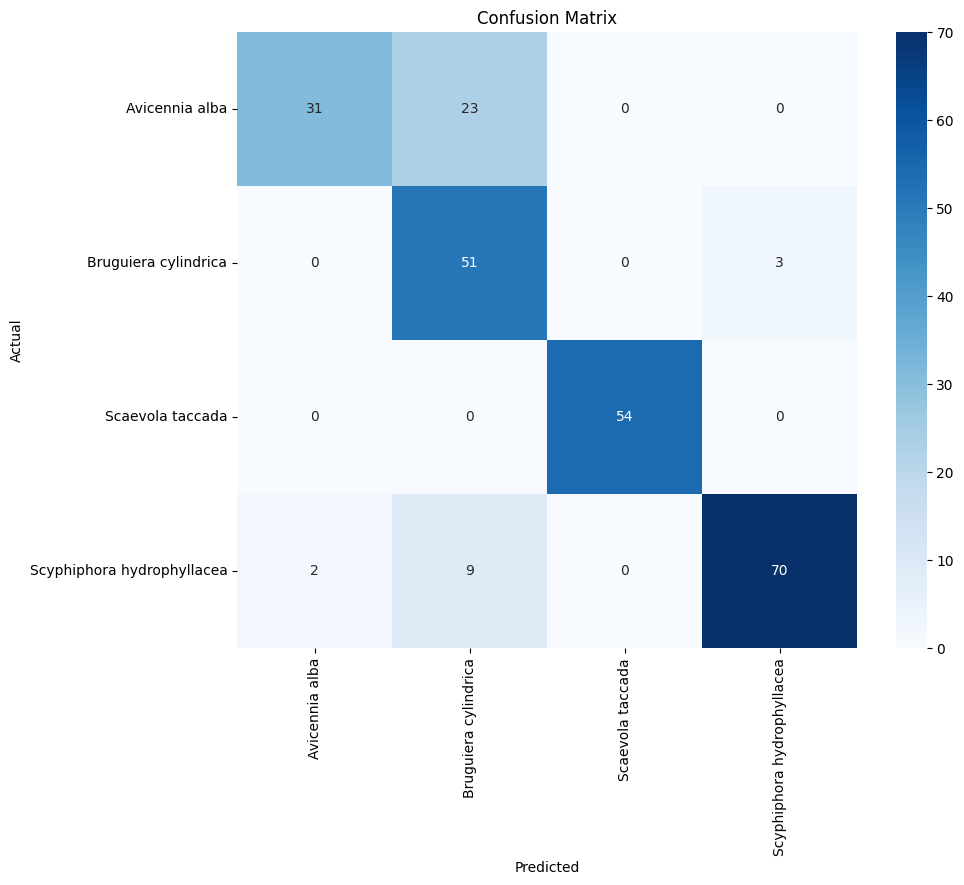


Classification Report:
                            precision    recall  f1-score     support
Avicennia alba               0.939394  0.574074  0.712644   54.000000
Bruguiera cylindrica         0.614458  0.944444  0.744526   54.000000
Scaevola taccada             1.000000  1.000000  1.000000   54.000000
Scyphiphora hydrophyllacea   0.958904  0.864198  0.909091   81.000000
accuracy                     0.847737  0.847737  0.847737    0.847737
macro avg                    0.878189  0.845679  0.841565  243.000000
weighted avg                 0.887157  0.847737  0.849068  243.000000

Accuracy for each class:
Avicennia alba: 57.41%
Bruguiera cylindrica: 94.44%
Scaevola taccada: 100.00%
Scyphiphora hydrophyllacea: 86.42%

Overall Accuracy: 84.77%


In [61]:
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file
file_path = r"C:\Users\USER\Documents\Skripsi Ghora\Skripsi Juli\Skripsi Desember Ghora\Pemrograman\Uji coba data baru\HasilPrediksiBackPro_Otsu.xlsx"
data = pd.read_excel(file_path)

# Extract the actual and predicted labels
actual_labels = data['Aktual']
predicted_labels = data['Prediksi']

# Create the confusion matrix
conf_matrix = confusion_matrix(actual_labels, predicted_labels, labels=actual_labels.unique())

# Create a DataFrame for better visualization
conf_matrix_df = pd.DataFrame(conf_matrix, index=actual_labels.unique(), columns=actual_labels.unique())

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Generate classification report
class_report = classification_report(actual_labels, predicted_labels, labels=actual_labels.unique(), target_names=actual_labels.unique(), output_dict=True)

# Convert classification report to DataFrame for better visualization
class_report_df = pd.DataFrame(class_report).transpose()

# Print Precision, Recall, F1-score, and Accuracy
print("\nClassification Report:")
print(class_report_df[['precision', 'recall', 'f1-score', 'support']])

# Calculate accuracy for each class manually
accuracies = {}
for label in actual_labels.unique():
    true_positive = conf_matrix_df.loc[label, label]
    total_actual = conf_matrix_df.loc[label].sum()
    accuracy = true_positive / total_actual if total_actual > 0 else 0
    accuracies[label] = accuracy * 100  # Convert to percentage

# Print accuracy for each class
print("\nAccuracy for each class:")
for label, accuracy in accuracies.items():
    print(f"{label}: {accuracy:.2f}%")

# Calculate overall accuracy
total_accuracy = accuracy_score(actual_labels, predicted_labels) * 100  # Convert to percentage
print(f"\nOverall Accuracy: {total_accuracy:.2f}%")
